In [2]:
# Mengimport library yang aka digunakan
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#pd.set_option('display.max_rows',None)  # Mengatur jumlah maksimal baris yang ditampilkan
#pd.set_option('display.max_columns',None)  # Menampilkan semua kolom (tanpa batasan)

In [5]:
# Mengupload data
data = pd.read_csv(r"C:\Users\USER\Documents\Mini Project (Portofolio)\VIX Idx Partner\loan_data_2007_2014.csv",index_col=0)
data.info()

C:\Users\USER\AppData\Local\Temp\ipykernel_12584\3927323206.py:2: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(r"C:\Users\USER\Documents\Mini Project (Portofolio)\VIX Idx Partner\loan_data_2007_2014.csv",index_col=0)


<class 'pandas.core.frame.DataFrame'>
Index: 466285 entries, 0 to 466284
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           466285 non-null  int64  
 1   member_id                    466285 non-null  int64  
 2   loan_amnt                    466285 non-null  int64  
 3   funded_amnt                  466285 non-null  int64  
 4   funded_amnt_inv              466285 non-null  float64
 5   term                         466285 non-null  object 
 6   int_rate                     466285 non-null  float64
 7   installment                  466285 non-null  float64
 8   grade                        466285 non-null  object 
 9   sub_grade                    466285 non-null  object 
 10  emp_title                    438697 non-null  object 
 11  emp_length                   445277 non-null  object 
 12  home_ownership               466285 non-null  object 
 13  annu

In [6]:
data.sample(2)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
186718,1595321,1865782,6950,6950,6900.0,36 months,7.90,217.47,A,A4,Narragansett Bay Commission,10+ years,OWN,41500.0,Verified,Nov-12,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 11/07/12 > Im using the lo...,debt_consolidation,Debt release,029xx,RI,28.83,0.0,Aug-96,3.0,NaN,NaN,16.0,0.0,22866,59.6,32.0,f,0.00,0.00,7828.80931,7772.49,6950.00,878.81,0.0,0.0,0.0,Nov-15,217.35,NaN,Nov-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,184778.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38382.0,NaN,NaN,NaN
342809,21520773,23853677,18000,18000,18000.0,36 months,6.03,547.84,A,A1,Software Engineer,3 years,MORTGAGE,90000.0,Not Verified,Jul-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,NaN,credit_card,Credit card refinancing,194xx,PA,18.54,0.0,Sep-95,0.0,NaN,NaN,13.0,0.0,16708,31.1,21.0,w,9405.72,9405.72,9861.12000,9861.12,8594.28,1266.84,0.0,0.0,0.0,Jan-16,547.84,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,320895.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53800.0,NaN,NaN,NaN


- Terdapat banyak kolom kosong yang tidak mememiliki informasi untuk mengatasinya perlu dilakukan drop akan kolom yang memiliki informasi.
- terdapat beberapa kolom yang meiliki tipe data yang kurang sesuai perlu dilakukan perbaikan tipe data pada kolom tersebut.

In [7]:
# menghapus kolom yang tidak memiliki value sama sekali
data= data.dropna(axis=1, how='all')
# cross cek data yang memiliki missing value
data.columns[data.isnull().any()].tolist()

['emp_title',
 'emp_length',
 'annual_inc',
 'desc',
 'title',
 'delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_util',
 'total_acc',
 'last_pymnt_d',
 'next_pymnt_d',
 'last_credit_pull_d',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_bal',
 'total_rev_hi_lim']

In [9]:
data['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [11]:
# Perbaikan type data kolom Emp_length
data['emp_length'] = data['emp_length'].str.replace('\+ years','')
data['emp_length'] = data['emp_length'].str.replace('< 1 year',str(0))
data['emp_length'] = data['emp_length'].str.replace(' years','')
data['emp_length'] = data['emp_length'].str.replace(' year','')
data['emp_length'] = data['emp_length'].str.replace('10+','10')

print(data['emp_length'].isnull().sum())
data['emp_length'] = data['emp_length'].fillna(0)

data['emp_length']= data['emp_length'].astype(int)
print(data['emp_length'].info())

21008
<class 'pandas.core.series.Series'>
Index: 466285 entries, 0 to 466284
Series name: emp_length
Non-Null Count   Dtype
--------------   -----
466285 non-null  int32
dtypes: int32(1)
memory usage: 5.3 MB
None


In [12]:
# Perbaikan type data kolom Term
data['term'] = data['term'].str.replace(' months','')
data['term']= data['term'].astype(int)
data['term'].unique()

array([36, 60])

In [13]:
#Renaming columns
data = data.rename(columns={'member_id': 'Member', 'loan_amnt' : 'Loan Amount', 'funded_amnt':'Funded Amount','funded_amnt_inv':'Amount Investors', 'term':'Tenor', 'int_rate' :'Rate',
                            'installment':'Installment','emp_title':'Employ Title','emp_length':'Employ Length','grade':'Grade','sub_grade':'Sub Grade','home_ownership':'Home Ownership',
                            'annual_inc':'Annual Income','verification_status':'Verification Status','issue_d':'Issue Date','loan_status':'Loan Status','pymnt_plan':'Payment Plan','desc':'Description',
                            'purpose':'Purpose','title':'Title','zip_code':'Zip Code','addr_state':'Addres States','delinq_2yrs':'Delinq 2 Years','mths_since_last_delinq':'Months Last Delinq',
                            'mths_since_last_record':'Months Last Record','open_acc':'Open Accord Credits','pub_rec':'Public Record','total_acc':'Total Accord','initial_list_status':'Initial status',
                            'total_pymnt':'Total Payment','total_pymnt_inv':'Total Payment Investation','last_pymnt_d':'Last Payment Date','last_pymnt_amnt':'Last Payment Amount',
                            'next_pymnt_d':'Next Payment Date','last_credit_pull_d':'Credit Pull Date','policy_code':'Police Code','application_type':'Application Type','acc_now_delinq': 'Accord Now Delinq',
                            'tot_coll_amt':'Total Collection Amount', 'tot_cur_bal':'Total Current Balance','total_rec_prncp':'Total Received Principal','total_rec_int': 'Total Interest Received',
                            'total_rec_late_fee':'Total Received Late','earliest_cr_line':'Earlist Credit Line','inq_last_6mths':'Inquiries Last 6Months','revol_bal':'Revolving Balance',
                            'revol_util':'Revolving Ultilization Rate','recoveries':'Recoveries', 'collection_recovery_fee':'Collection Recovery Fee','collections_12_mths_ex_med':'Collections 12 Months',
                            'mths_since_last_major_derog':'Months Since Recent 90 Day','total_rev_hi_lim':'Total Revolving High Limit','out_prncp':'Outstanding Pricipal',
                            'out_prncp_inv':'Outstanding Pricipal Investors'})
data.sample(2)

,id,Member,Loan Amount,Funded Amount,Amount Investors,Tenor,Rate,Installment,Grade,Sub Grade,Employ Title,Employ Length,Home Ownership,Annual Income,Verification Status,Issue Date,Loan Status,Payment Plan,url,Description,Purpose,Title,Zip Code,Addres States,dti,Delinq 2 Years,Earlist Credit Line,Inquiries Last 6Months,Months Last Delinq,Months Last Record,Open Accord Credits,Public Record,Revolving Balance,Revolving Ultilization Rate,Total Accord,Initial status,Outstanding Pricipal,Outstanding Pricipal Investors,Total Payment,Total Payment Investation,Total Received Principal,Total Interest Received,Total Received Late,Recoveries,Collection Recovery Fee,Last Payment Date,Last Payment Amount,Next Payment Date,Credit Pull Date,Collections 12 Months,Months Since Recent 90 Day,Police Code,Application Type,Accord Now Delinq,Total Collection Amount,Total Current Balance,Total Revolving High Limit
341645,21881079,24214038,28000,28000,27975.0,36,9.17,892.61,B,B1,IT Compliance Sr. Mgr,10,MORTGAGE,140000.0,Source Verified,Jul-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,NaN,credit_card,Credit card refinancing,319xx,GA,21.75,1.0,Oct-92,0.0,23.0,NaN,18.0,0.0,49095,66.6,41.0,f,15730.09,15716.04,15174.37,15160.82,12269.91,2904.46,0.0,0.0,0.0,Dec-15,892.61,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,0.0,261755.0,73700.0
413523,13408712,15461003,18000,18000,18000.0,60,15.31,431.16,C,C4,HR/LR Specialist,10,MORTGAGE,82500.0,Source Verified,Apr-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,451xx,OH,6.55,0.0,Nov-96,2.0,NaN,NaN,8.0,0.0,10603,31.1,21.0,w,13182.15,13182.15,9054.36,9054.36,4817.85,4236.51,0.0,0.0,0.0,Jan-16,431.16,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,50.0,10603.0,34100.0


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 466285 entries, 0 to 466284
Data columns (total 57 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              466285 non-null  int64  
 1   Member                          466285 non-null  int64  
 2   Loan Amount                     466285 non-null  int64  
 3   Funded Amount                   466285 non-null  int64  
 4   Amount Investors                466285 non-null  float64
 5   Tenor                           466285 non-null  int32  
 6   Rate                            466285 non-null  float64
 7   Installment                     466285 non-null  float64
 8   Grade                           466285 non-null  object 
 9   Sub Grade                       466285 non-null  object 
 10  Employ Title                    438697 non-null  object 
 11  Employ Length                   466285 non-null  int32  
 12  Home Ownership       

In [15]:
data['Issue Date'] = data['Issue Date'].str.split('-').str[0]
data['Last Payment Date'] = data['Last Payment Date'].str.split('-').str[0]
data['Credit Pull Date'] = data['Credit Pull Date'].str.split('-').str[0]
data['Earlist Credit Line'] = data['Earlist Credit Line'].str.split('-').str[1]

In [16]:
def fill_columns_with_mode(data, col):
    for column in col:
        if column in data.columns:
            mode_value = data[column].mode().values[0]
            data[column].fillna(mode_value, inplace=True)

    return data

fill_columns_with_mode(data,['Issue Date','Last Payment Date','Credit Pull Date'] )
print(data['Issue Date'].isnull().sum())
print(data['Last Payment Date'].isnull().sum())
print(data['Credit Pull Date'].isnull().sum())

0
0
0


In [17]:
data['Earlist Credit Line'] = data['Earlist Credit Line'].fillna(0)
data['Earlist Credit Line'] = data['Earlist Credit Line'].astype(int)
data['Earlist Credit Line'].info()

<class 'pandas.core.series.Series'>
Index: 466285 entries, 0 to 466284
Series name: Earlist Credit Line
Non-Null Count   Dtype
--------------   -----
466285 non-null  int32
dtypes: int32(1)
memory usage: 5.3 MB


In [18]:
# Tabel kontogensi pinjaman, status pinjaman, dengan tujuan pinjaman
pd.crosstab(data['Purpose'], data['Loan Status'], values=data['Loan Amount'], aggfunc='mean').round(2).sort_values(by='Charged Off', ascending=False)

Loan Status,Charged Off,Current,Default,Does not meet the credit policy. Status:Charged Off,Does not meet the credit policy. Status:Fully Paid,Fully Paid,In Grace Period,Late (16-30 days),Late (31-120 days)
Purpose,,,,,,,,,
small_business,16202.57,15868.20,20019.23,15044.44,14194.38,14482.24,17053.98,14115.91,17895.05
debt_consolidation,15321.13,15892.75,15808.82,9739.13,10156.19,14102.38,16648.89,16590.97,16024.10
home_improvement,15027.38,14410.18,15976.67,9507.75,9010.31,13078.91,17319.69,15742.16,16029.70
house,14768.82,14886.17,19862.50,7993.18,7807.58,15298.69,12294.44,22506.25,15088.97
credit_card,14719.33,15530.89,14724.22,10705.80,9528.51,13560.71,16257.96,15718.84,15720.06
major_purchase,11803.59,11650.76,13333.33,8327.17,6286.75,9337.34,15066.80,14005.43,13658.08
wedding,11634.34,11686.07,NaN,8815.38,7267.44,10133.90,11400.00,NaN,14203.57
renewable_energy,10964.22,10846.74,NaN,5000.00,6000.00,9421.50,13116.67,NaN,10937.50
other,10080.17,9896.17,11376.11,7660.95,6323.93,9021.30,11545.95,10851.43,10991.57


Penjelasannya :
- Untuk status pinjam **pembayaran penuh (full- paid)** yang memiliki rata-rata tertinggi pembayaran bulan lalu adalah yang memiliki tujuan pinjaman **Rumah**.
-  Untuk status pinjam **dikenai biaya (Charged Off)** yang memiliki rata-rata tertinggi pembayaran bulan lalu adalah yang memiliki tujuan pinjaman **small  bussines**.
- Untuk status pinjam **masih berjalan (Current)** yang memiliki rata-rata tertinggi pembayaran bulan lalu adalah yang memiliki tujuan pinjaman **debt consolidation**.
- Untuk status pinjam **gagal bayar (Default)** yang memiliki rata-rata tertinggi pembayaran bulan lalu adalah yang memiliki tujuan pinjaman **small bussines**.
- Untuk status pinjam **tidak memenuhi kebijakan kredit status dikenai biaya (Does not meet the credit policy. Status:Charged Off)** yang memiliki rata-rata tertinggi pembayaran bulan lalu adalah yang memiliki tujuan pinjaman **small bussines**.
- Untuk status pinjam **tidak memenuhi kebijakan kredit status dibayar penuh (Does not meet the credit policy. Status:fully paid)** yang memiliki rata-rata tertinggi pembayaran bulan lalu adalah yang memiliki tujuan pinjaman **small bussines**.
- Untuk status pinjam **Dalam masa tenggang (in-grace period)**yang memiliki rata-rata tertinggi pembayaran bulan lalu adalah yang memiliki tujuan pinjaman **perbaikan Rumah**.
- Untuk status pinjam **terlambat 2 minggu- 1 bulan (late 16-30 )** yang memiliki rata-rata tertinggi pembayaran bulan lalu adalah yang memiliki tujuan pinjaman **Rumah**.
- Untuk status pinjam **terlambat 1 bulan - 4 bulan (late 31-120)** yang memiliki rata-rata tertinggi pembayaran bulan lalu adalah yang memiliki tujuan pinjaman **small bussines**.


### KESIMPULAN
Yang memiliki tujuan pinjaman **Small Bussines** memiliki potensi buruk terhadap pembayaran.

In [19]:
# tabel kontingensi antara tujuan dengan status pinjaman
pd.crosstab( data['Loan Status'] , data['Purpose'], margins=False).nlargest(10, columns='wedding')

Purpose,car,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding
Loan Status,,,,,,,,,,,,,,
Fully Paid,2966,38169,106441,269,11076,1182,4912,2054,1404,10063,200,3164,1150,1689
Current,1876,55892,133134,0,12453,714,3790,1856,1079,9843,92,2170,1004,323
Charged Off,425,7380,25835,56,2126,267,808,523,393,2771,51,1322,253,265
Does not meet the credit policy. Status:Fully Paid,51,271,808,65,143,33,100,36,31,303,2,89,13,43
Does not meet the credit policy. Status:Charged Off,13,69,292,32,71,11,23,22,15,121,1,72,6,13
Late (31-120 days),38,1371,4398,0,378,34,99,63,43,332,2,106,29,7
In Grace Period,16,625,1976,0,193,18,64,32,15,142,3,44,15,3
Default,5,161,544,0,30,6,9,8,6,45,0,13,5,0
Late (16-30 days),7,219,767,0,67,4,23,8,8,70,0,33,12,0


Kesimpulan nasabah dengan tujuan debt consolidation cenderung akan masuk ke daftar status pembayaran kurang baik.

In [20]:
# tabel kontigensi lamanya tenor dengan status pinjaman
pd.crosstab(data['Tenor'], data['Loan Status'], margins=True).sort_values(by='All',ascending=False)

Loan Status,Charged Off,Current,Default,Does not meet the credit policy. Status:Charged Off,Does not meet the credit policy. Status:Fully Paid,Fully Paid,In Grace Period,Late (16-30 days),Late (31-120 days),All
Tenor,,,,,,,,,,
All,42475,224226,832,761,1988,184739,3146,1218,6900,466285
36,27455,149505,490,649,1789,151101,1979,769,4216,337953
60,15020,74721,342,112,199,33638,1167,449,2684,128332


Nasabah lebih banyak menggunakan tenor 36x dibanding 60x.

In [21]:
result = pd.crosstab(data['Rate'], data['Tenor'], margins=False)
top_10 = result.nlargest(10, columns=[36])
Top_10 = result.nlargest(10, columns=[60])
print('Tenor =36')
print(top_10)
print()
print('Tenor =60')
print(Top_10)

Tenor =36
Tenor     36    60
Rate              
10.99  13274  1563
12.99  12501  3345
8.90   10777   647
7.90    9983    96
6.03    9846     0
11.99   9021  1093
12.12   8579   835
12.49   8329  1398
13.11   7507   954
15.61   7049  6025

Tenor =60
Tenor     36    60
Rate              
15.61   7049  6025
17.57   3687  4427
16.29   6185  4402
12.99  12501  3345
14.99   4890  3213
16.99   3173  3213
13.98   6774  3029
14.49   4230  3013
19.52   2356  2545
15.31   6011  2285


- Setelah dilakukan analisa didapat untuk tenor 36 nasabah cendrung menggunakan rate kisaran 6.03 - 15.61 %.
- Sedangkan pada tenor 60 nasabah cenderung menggunakan Rate 13 % keatas.  

In [22]:
# tabel kontigensi status kepemilikan, status pinjaman dengan pendapatan tahunan.
pd.crosstab(data['Home Ownership'], data['Loan Status'], values=data['Annual Income'], aggfunc='mean').round(2)

Loan Status,Charged Off,Current,Default,Does not meet the credit policy. Status:Charged Off,Does not meet the credit policy. Status:Fully Paid,Fully Paid,In Grace Period,Late (16-30 days),Late (31-120 days)
Home Ownership,,,,,,,,,
ANY,NaN,NaN,NaN,NaN,NaN,35680.00,NaN,NaN,NaN
MORTGAGE,74293.55,84473.02,75169.58,91328.28,92756.31,84013.96,84074.56,82412.25,79571.61
NONE,48685.71,80000.00,NaN,72000.00,NaN,65529.19,NaN,NaN,NaN
OTHER,59696.70,65993.33,NaN,38220.55,69151.48,70492.03,NaN,NaN,NaN
OWN,58723.39,67221.07,54850.97,77313.30,60047.82,65548.92,68870.57,63051.15,64114.38
RENT,56881.56,63247.98,59271.40,47858.53,53523.71,62730.58,64532.56,62270.98,60023.41


Untuk pendapatan tahunan tertinggi dari nasabah yang meminjam ada pada Status Kepemilikan ** Mortgage**.

In [23]:
# Tabel Kontigensi Loan status dengan Home Ownership
pd.crosstab(data['Loan Status'], data['Home Ownership'], values=data['Employ Length'], aggfunc='mean')

Home Ownership,ANY,MORTGAGE,NONE,OTHER,OWN,RENT
Loan Status,,,,,,
Charged Off,NaN,6.218948,4.428571,4.888889,5.292024,4.845223
Current,NaN,6.525282,10.000000,10.000000,5.833772,5.036945
Default,NaN,6.247863,NaN,NaN,5.144928,5.410194
Does not meet the credit policy. Status:Charged Off,NaN,5.362069,6.000000,3.000000,5.775510,3.539773
Does not meet the credit policy. Status:Fully Paid,NaN,5.038546,0.000000,3.148148,3.949275,3.010977
Fully Paid,5.0,6.355896,6.694444,4.403509,5.564529,4.685248
In Grace Period,NaN,6.544148,NaN,NaN,5.699029,4.976017
Late (16-30 days),NaN,6.056013,NaN,NaN,5.796875,4.815735
Late (31-120 days),NaN,6.369510,NaN,NaN,5.465961,4.940911


Karakteristik nasabah yang meminjam adalah nasabah yang sudah bekerja diatas 3.5 tahun.

In [24]:
pd.crosstab(data['Home Ownership'],data['Employ Length'],values=data['Rate'], aggfunc='mean').round(2)

Employ Length,0,1,2,3,4,5,6,7,8,9,10
Home Ownership,,,,,,,,,,,
ANY,NaN,NaN,NaN,NaN,NaN,11.67,NaN,NaN,NaN,NaN,NaN
MORTGAGE,13.41,13.43,13.39,13.42,13.41,13.44,13.60,13.66,13.54,13.57,13.68
NONE,12.27,18.52,11.62,12.12,19.05,11.53,12.33,12.70,15.31,14.74,16.79
OTHER,13.35,13.26,13.97,14.11,12.78,12.64,12.57,13.87,12.44,16.85,13.52
OWN,13.86,13.91,13.93,13.88,13.98,14.10,13.93,13.98,14.06,14.03,13.92
RENT,13.96,13.78,13.88,13.88,13.93,14.12,14.16,14.36,14.32,14.37,14.60


Suku bunga yang paling diminati dilihat dari tahun kerja nasabah rata-rata dikisaran diatas 12%

In [25]:
# Tabel kontigensi grade, status verifikasi berdasarkan jumlah tertinggi nasabah
pd.crosstab(data['Grade'],data['Verification Status'],values=data['id'], aggfunc='count')

Verification Status,Not Verified,Source Verified,Verified
Grade,,,
A,33233,22636,18998
B,53583,40421,42925
C,35807,41781,47705
D,18663,27116,31109
E,5256,12863,17638
F,1407,4175,7647
G,288,1001,2033


Dari ketiga jenis status verifikasi dikonfirmasi bahwa grade **B dan C** memiliki dampak besar.

In [26]:
# tabel kontigensi Pendapatan tahunan , kenakalan 2 tahun terakhir dan grade
pd.crosstab(data['Grade'],data['Delinq 2 Years'],values=data['Annual Income'], aggfunc='mean')

Delinq 2 Years,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,21.0,22.0,24.0,29.0
Grade,,,,,,,,,,,,,,,,,,,,,,,,
A,81460.797058,91871.247664,96621.551615,102072.000000,90832.614035,90377.333333,82231.187500,103979.166667,101000.000000,89142.857143,83000.000000,62500.000000,90000.000000,131500.000000,NaN,NaN,82746.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
B,70844.405285,77496.431763,83001.218705,84811.086172,86555.955346,83999.130814,81547.455939,80696.345000,88786.909091,84634.666667,114922.222222,89718.461538,85150.000000,66666.666667,NaN,47000.000000,66500.0,NaN,105000.0,47500.0,67260.0,NaN,98000.0,NaN
C,68376.215672,76201.749690,80462.907701,85498.590734,85403.545548,86551.298022,77071.660258,78462.507685,84180.098361,90500.360000,87033.565217,77893.076923,64406.600000,127089.000000,56100.0,69833.333333,57000.0,NaN,81000.0,88282.5,32646.0,67577.5,NaN,51500.0
D,67402.110151,76969.061330,80446.082287,85557.586229,82381.398618,83342.014745,76125.397351,92793.802658,83976.388889,89308.284706,107149.857143,53679.500000,65666.666667,61134.000000,48000.0,100000.000000,80000.0,81000.0,49000.0,NaN,NaN,NaN,NaN,NaN
E,70840.406836,79928.859144,87796.411389,84352.959059,84710.628930,80145.870690,103869.540984,99137.666667,93491.752000,96468.985455,110000.000000,44848.000000,67140.000000,77000.000000,101500.0,85000.000000,NaN,NaN,100000.0,NaN,NaN,NaN,NaN,NaN
F,72683.442937,82961.606711,82814.239583,89685.472574,89222.554800,97085.846154,82742.222222,113077.230769,81582.428571,94000.000000,107500.000000,51000.000000,NaN,NaN,NaN,NaN,NaN,110000.0,NaN,NaN,NaN,NaN,NaN,NaN
G,83745.633079,91746.281023,90640.101605,103229.128571,83869.125000,169333.333333,103977.500000,71000.000000,75000.000000,56800.000000,NaN,220000.000000,74250.000000,93000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- Dilihat dari pendapatan tahunan nasabah yang melakukan kenakalan **19-29 kali** dalam kurung waktu kurang dari 2 tahun adalah **grade B dan C**, memiliki rata-rata pendapatan di kisaran 30-80.

- **Semakin tinggi Pendapatan tahunan** nasabah menunjukan semakin **kecil jumlah kenakalan dalam 2 tahun terakhir**.

In [27]:
# tabel kontigensi Grade, Sub Grade berdasarkan rata-rata Suku bunga
pd.crosstab(data['Grade'],data['Sub Grade'],values=data['Rate'], aggfunc='mean')

Sub Grade,A1,A2,A3,A4,A5,B1,B2,B3,B4,B5,C1,C2,C3,C4,C5,D1,D2,D3,D4,D5,E1,E2,E3,E4,E5,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5
Grade,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A,6.006046,6.552704,7.388607,7.796832,8.638248,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
B,NaN,NaN,NaN,NaN,NaN,9.62653,10.660027,11.592758,12.358864,12.946059,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.525126,14.106759,14.681571,15.249956,15.894034,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.521458,17.121836,17.657839,18.212148,18.885137,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
E,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.385469,20.025899,20.626064,21.329663,22.046304,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.845919,23.319297,23.845428,24.163861,24.485512,NaN,NaN,NaN,NaN,NaN
G,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.824283,24.929721,25.035094,24.589052,24.659247


In [28]:
data.groupby('Grade').agg({'Rate':'mean'})

,Rate
Grade,
A,7.538624
B,11.503253
C,14.634089
D,17.540598
E,20.487115
F,23.551352
G,24.838393


In [29]:
data.groupby(['Grade','Sub Grade']).agg({'Earlist Credit Line':'count'}).sort_values(by ='Earlist Credit Line')

Earlist Credit Line
Grade Sub Grade                     
G     G5                         385
      G4                         422
      G3                         583
      G2                         823
      G1                        1109
F     F5                        1513
      F4                        2067
      F3                        2708
      F2                        3001
      F1                        3940
E     E5                        5087
      E4                        5992
      E3                        6976
      E2                        8669
      E1                        9033
A     A1                       10541
      A2                       10956
D     D5                       11566
A     A3                       12568
D     D4                       14099
      D3                       14916
      D2                       17046
A     A4                       19045
D     D1                       19261
A     A5                       21757
C     C5                       22178
B     B1                       22876
C     C4                       24105
B     B5                       25252
C     C3                       25317
B     B2                       26610
C     C2                       26740
      C1                       26953
B     B4                       30505
      B3                       31686

In [30]:
gradeB =data[data['Grade']=='B']
gradeB['Earlist Credit Line'].unique()

array([85, 96,  4, 89,  3, 91, 83,  1,  2, 84,  6,  5,  0,  7, 99, 92, 97,
       98, 90, 95, 93, 80, 94, 86, 79, 82, 88, 87, 76, 75, 78, 81,  8, 72,
       77, 67, 65, 70, 73, 71, 69, 74, 62, 64, 63, 66, 68, 56, 46, 50, 61,
        9, 10, 60, 57, 53, 59, 55, 51, 11, 58, 49, 54])

In [31]:
gradeB3 =data[data['Sub Grade']=='B3']
gradeB3['Earlist Credit Line'].unique()

array([ 3, 85,  1, 84,  6, 96, 90,  7,  2, 86, 79,  5, 98, 95,  4,  0, 91,
       94, 99, 87, 97, 89, 92, 88, 93, 77, 81,  8, 71, 75, 74, 83, 82, 76,
       78, 73, 67, 80, 64, 72, 70, 56, 69, 50, 61, 10,  9, 65, 68, 66, 62,
       60, 63, 11, 46, 54, 58, 53])

In [32]:
gradeB3.groupby('Earlist Credit Line').agg({'Sub Grade':'count'})

,Sub Grade
Earlist Credit Line,
0,2395
1,2372
2,2007
3,1612
4,1414
5,1210
6,1038
7,829
8,418


Nasabah yang memiliki sub grade B3 merupakan pelanggan yang mampunyai Earlist Credit Line yang bagus. Hal ini bisa menjadi acuan untuk mengetahui Credit skor terbaik dari nasabah itu sendiri. Semakin lama Earlist Credit Line maka semakin bagus nilai credit skor karena sudah memiliki pengalaman baik terhadap kartu kredit.

In [33]:
data.groupby(['Grade','Sub Grade']).agg({'Inquiries Last 6Months':'count'}).sort_values(by ='Inquiries Last 6Months')

Inquiries Last 6Months
Grade Sub Grade                        
G     G5                            385
      G4                            422
      G3                            583
      G2                            823
      G1                           1109
F     F5                           1513
      F4                           2067
      F3                           2708
      F2                           3001
      F1                           3940
E     E5                           5087
      E4                           5992
      E3                           6975
      E2                           8669
      E1                           9033
A     A1                          10540
      A2                          10953
D     D5                          11566
A     A3                          12564
D     D4                          14099
      D3                          14915
      D2                          17046
A     A4                          19044
D     D1                          19261
A     A5                          21755
C     C5                          22178
B     B1                          22876
C     C4                          24102
B     B5                          25250
C     C3                          25316
B     B2                          26608
C     C2                          26740
      C1                          26951
B     B4                          30502
      B3                          31683

In [34]:
gradeB =data[data['Grade']=='B']
gradeB['Inquiries Last 6Months'].unique()

array([ 1.,  0.,  2.,  3.,  4.,  5.,  6.,  7.,  8., 11., 15.,  9., 17.,
       12., 16., 13., nan])

In [35]:
gradeB3 =data[data['Sub Grade']=='B3']
gradeB3['Inquiries Last 6Months'].unique()

array([ 0.,  1.,  3.,  2.,  4.,  5.,  6.,  8., 11., 16., nan,  7.])

In [36]:
gradeB3.groupby('Inquiries Last 6Months').agg({'Sub Grade':'count'})

,Sub Grade
Inquiries Last 6Months,
0.0,19723
1.0,7585
2.0,2918
3.0,1059
4.0,279
5.0,80
6.0,34
7.0,2
8.0,1


setelah dilakukan analisa untuk sub grade B3 yang memiliki Earlist Credit Line yang baik, ternyata jarang dilakukan Inquiries Last 6Months(diajukan pertanyaan oleh pihak bank) dikarenakan memiliki skor kredit yang cukup baik. Namun hal ini harus di review untuk melihat perkembangan nasabah itu sendiri untuk menghindari resiko.

In [37]:
data.groupby('Grade').agg({'Collections 12 Months':'count'})

,Collections 12 Months
Grade,
A,74832
B,136900
C,125266
D,76871
E,35739
F,13217
G,3315


In [38]:
collectionB = data[data['Grade']=='B']
collectionB.groupby('Collections 12 Months').agg({'Grade':'count'})

,Grade
Collections 12 Months,
0.0,135894
1.0,942
2.0,58
3.0,4
4.0,1
5.0,1


In [39]:
collectionC = data[data['Grade']=='C']
collectionC.groupby('Collections 12 Months').agg({'Grade':'count'})

,Grade
Collections 12 Months,
0.0,124050
1.0,1130
2.0,74
3.0,8
4.0,2
6.0,1
20.0,1


Dari hasil analisa Grade B dan C merupakan nasabah yang memiliki menejemen keuangan yang baik terlihat dari jumlah Collections 12 Months yang rendah mendominasi nasabah Grade B dan C

### Kesimpulan

Dari beberapa analisa yang dilakukan untuk Grade B dan C merupakan nasabah yang memiliki potensi tinggi, dari segi pengahasilan tahunan, catatan keterlambatan yang rendah, dan memiliki skor kredit yang baik. Skor kredit yang baik ini dilihat dari tahun pertama penggunaan kartu kredit pertama kalinya. semakin lama tahun tersebut maka akan menggambarkan semakin lama juga pengalaman nasabah dalam menggunakan kartu kredit.  

In [40]:
data['Collections 12 Months'].unique()

array([ 0., nan,  1.,  2.,  4.,  3.,  6., 16., 20.,  5.])

In [41]:
cat_df=data.select_dtypes(include='object')
Num_df= data.select_dtypes(exclude='object')
cat_df.sample(2)

,Grade,Sub Grade,Employ Title,Home Ownership,Verification Status,Issue Date,Loan Status,Payment Plan,url,Description,Purpose,Title,Zip Code,Addres States,Initial status,Last Payment Date,Next Payment Date,Credit Pull Date,Application Type
187648,B,B2,The Walt Disney Company,MORTGAGE,Verified,Nov,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,wedding,Wedding Loan,328xx,FL,w,Nov,NaN,Jan,INDIVIDUAL
430862,B,B5,Fleet Manager,RENT,Source Verified,Mar,Current,n,https://www.lendingclub.com/browse/loanDetail....,NaN,credit_card,Credit card refinancing,953xx,CA,f,Jan,Feb-16,Jan,INDIVIDUAL


In [42]:
Num_df.sample(2)

,id,Member,Loan Amount,Funded Amount,Amount Investors,Tenor,Rate,Installment,Employ Length,Annual Income,dti,Delinq 2 Years,Earlist Credit Line,Inquiries Last 6Months,Months Last Delinq,Months Last Record,Open Accord Credits,Public Record,Revolving Balance,Revolving Ultilization Rate,Total Accord,Outstanding Pricipal,Outstanding Pricipal Investors,Total Payment,Total Payment Investation,Total Received Principal,Total Interest Received,Total Received Late,Recoveries,Collection Recovery Fee,Last Payment Amount,Collections 12 Months,Months Since Recent 90 Day,Police Code,Accord Now Delinq,Total Collection Amount,Total Current Balance,Total Revolving High Limit
339002,22472107,24794983,11200,11200,11200.0,60,14.49,263.46,9,75000.0,17.60,0.0,6,0.0,NaN,NaN,8.0,0.0,8325,74.3,12.0,0.00,0.00,12854.57,12854.57,11200.00,1654.57,0.0,0.0,0.0,9693.05,0.0,NaN,1,0.0,0.0,131802.0,11200.0
258566,34452459,37115753,18000,18000,18000.0,60,17.14,448.71,10,54600.0,8.97,0.0,1,1.0,NaN,NaN,8.0,0.0,14186,76.3,20.0,15053.63,15053.63,6132.73,6132.73,2946.37,3186.36,0.0,0.0,0.0,448.71,0.0,NaN,1,0.0,0.0,168795.0,18600.0


In [44]:
data['Addres States'].unique()

array(['AZ', 'GA', 'IL', 'CA', 'OR', 'NC', 'TX', 'VA', 'MO', 'CT', 'UT',
       'FL', 'NY', 'PA', 'MN', 'NJ', 'KY', 'OH', 'SC', 'RI', 'LA', 'MA',
       'WA', 'WI', 'AL', 'CO', 'KS', 'NV', 'AK', 'MD', 'WV', 'VT', 'MI',
       'DC', 'SD', 'NH', 'AR', 'NM', 'MT', 'HI', 'WY', 'OK', 'DE', 'MS',
       'TN', 'IA', 'NE', 'ID', 'IN', 'ME'], dtype=object)

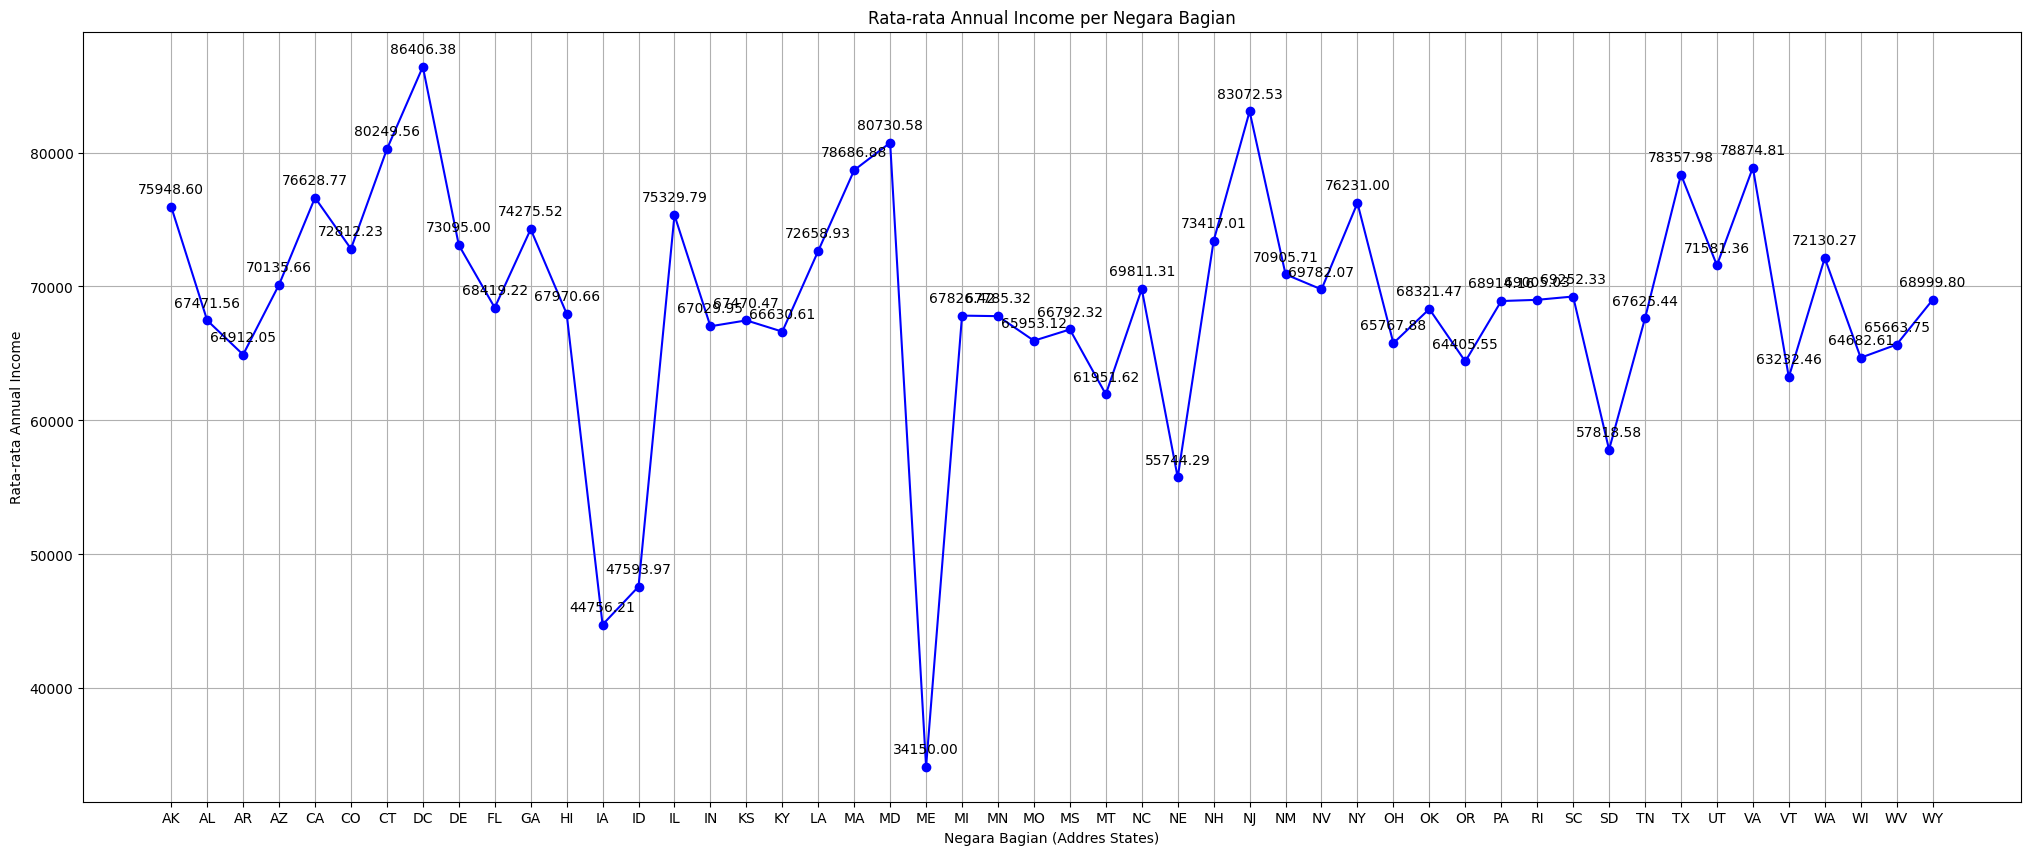

In [55]:
# Pendapatan tahunan berdasarkan negara
agg_country = data.groupby('Addres States').agg({'Annual Income':'mean'}).reset_index()
agg_country

# Membuat Visualisasi
plt.figure(figsize=(25, 10))
plt.plot(agg_country['Addres States'], agg_country['Annual Income'], marker='o', linestyle='-', color='b')

for i, row in agg_country.iterrows():
    plt.annotate(f'{row["Annual Income"]:.2f}', (row['Addres States'], row['Annual Income'] + 1000), ha='center')

plt.title('Rata-rata Annual Income per Negara Bagian')
plt.xlabel('Negara Bagian (Addres States)')
plt.ylabel('Rata-rata Annual Income')
plt.grid(True)
plt.show()

Berdasarkan analisa terdapat 3 negara yang memiliki jumlah pendapatan tahunan rendah yaitu :IA, ID dan ME

f:\Anaconda\envs\tutorial_notebook\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
f:\Anaconda\envs\tutorial_notebook\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\USER\AppData\Local\Temp\ipykernel_17144\616566179.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
f:\Anaconda\envs\tutorial_notebook\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\USER\AppData\Local\Temp\ipykernel_17144\616566179.py:6:

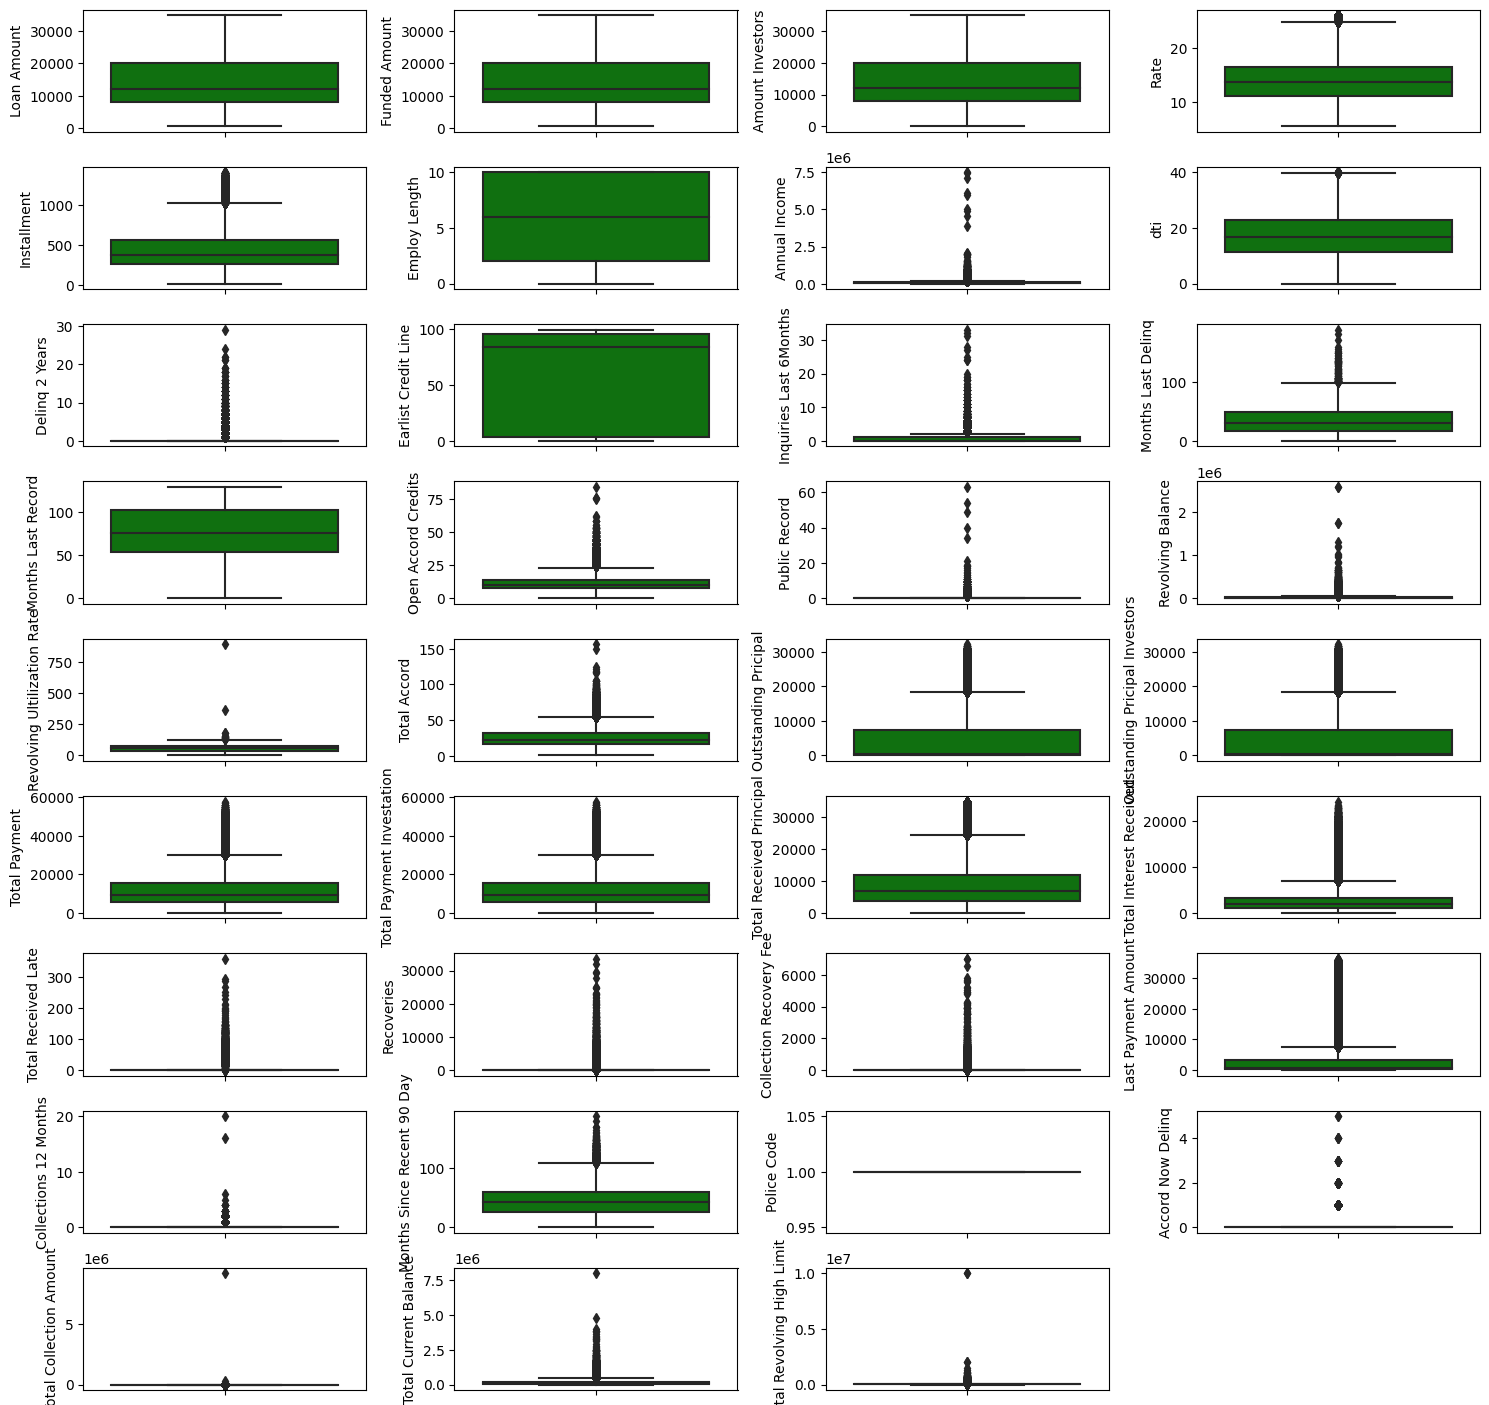

In [43]:
num_df=['Loan Amount',	'Funded Amount',	'Amount Investors',	'Rate',	'Installment',	'Employ Length',	'Annual Income',	'dti',	'Delinq 2 Years',	'Earlist Credit Line',	'Inquiries Last 6Months',	'Months Last Delinq',	'Months Last Record',	'Open Accord Credits',	'Public Record',	'Revolving Balance',	'Revolving Ultilization Rate',	'Total Accord',	'Outstanding Pricipal',	'Outstanding Pricipal Investors',	'Total Payment',	'Total Payment Investation',	'Total Received Principal',	'Total Interest Received',	'Total Received Late',	'Recoveries',	'Collection Recovery Fee',	'Last Payment Amount',	'Collections 12 Months',	'Months Since Recent 90 Day',	'Police Code',	'Accord Now Delinq',	'Total Collection Amount',	'Total Current Balance',	'Total Revolving High Limit']
plt.figure(figsize=(15,55))
for i in range (0, len(num_df)):
  plt. subplot(len(num_df),4, i+1)
  sns.boxplot(y=data[num_df[i]], color='green', orient='v')
  plt.tight_layout()

Hampir semua feature numerik memiliki outlier.

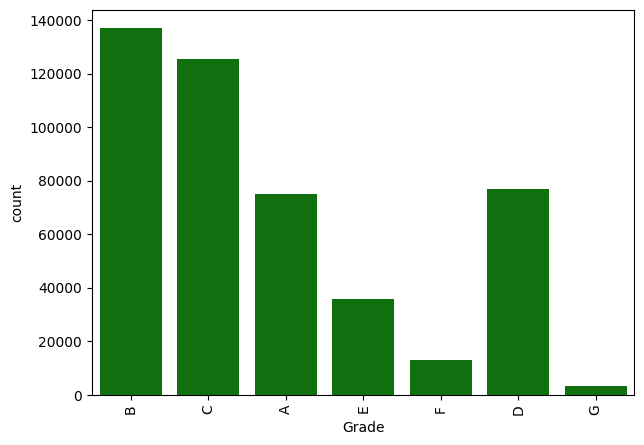

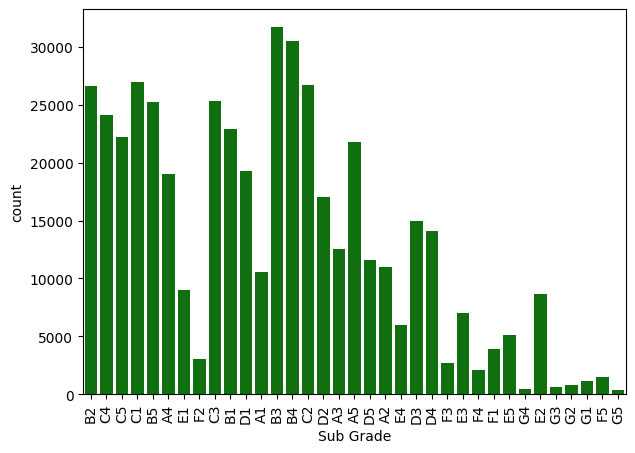

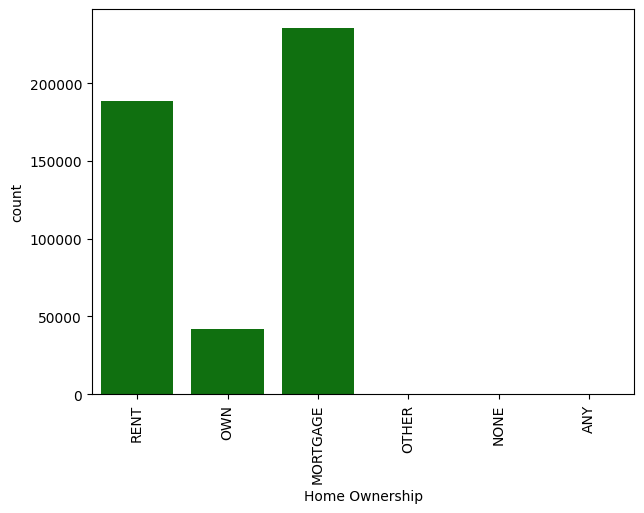

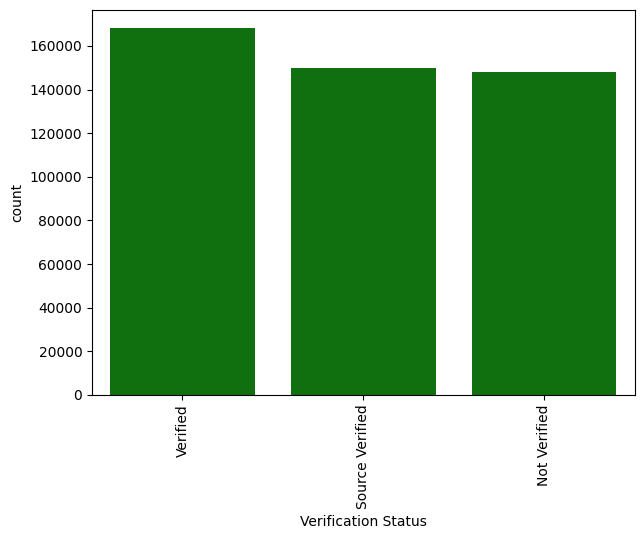

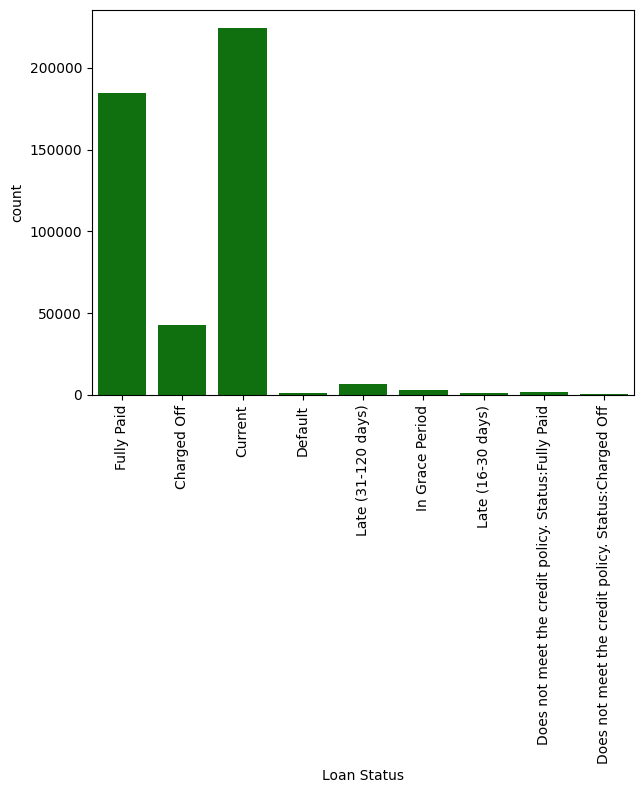

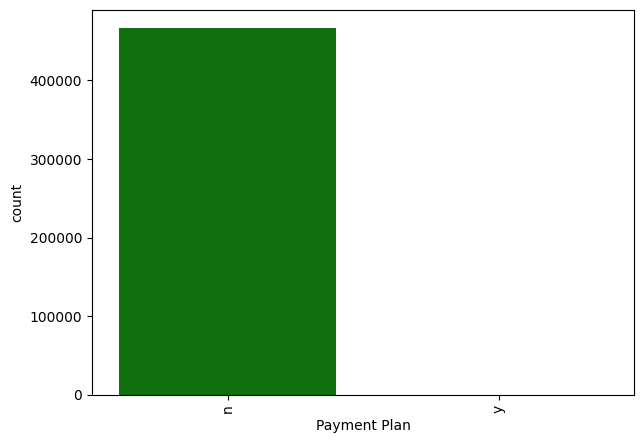

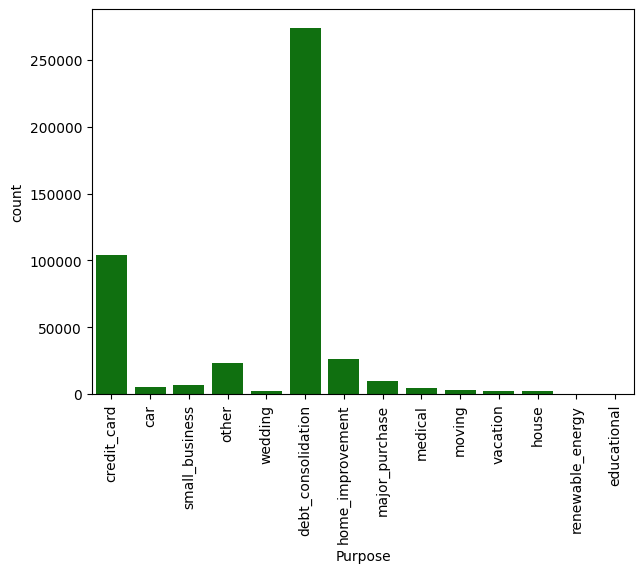

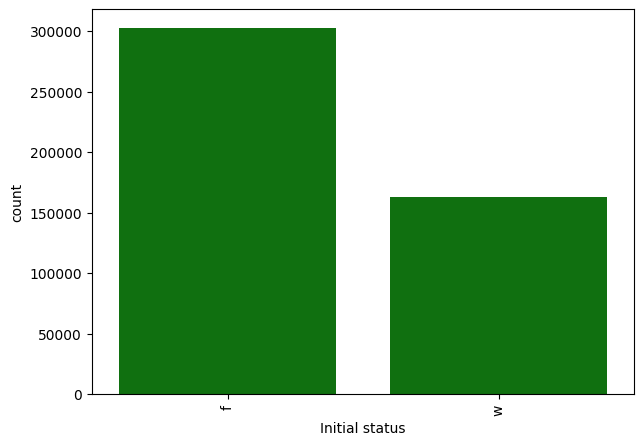

In [ ]:
Cat_df=['Grade',	'Sub Grade',	'Home Ownership',	'Verification Status',	'Loan Status',	'Payment Plan',	'Purpose',	'Initial status']

for i in range(len(Cat_df)):
  plt.figure(figsize=(7,5))
  sns.countplot(x=data[Cat_df[i]], data=data, color='green')
  plt.xticks(rotation=90)

<ipython-input-61-3b224becf01a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  c= data.corr()


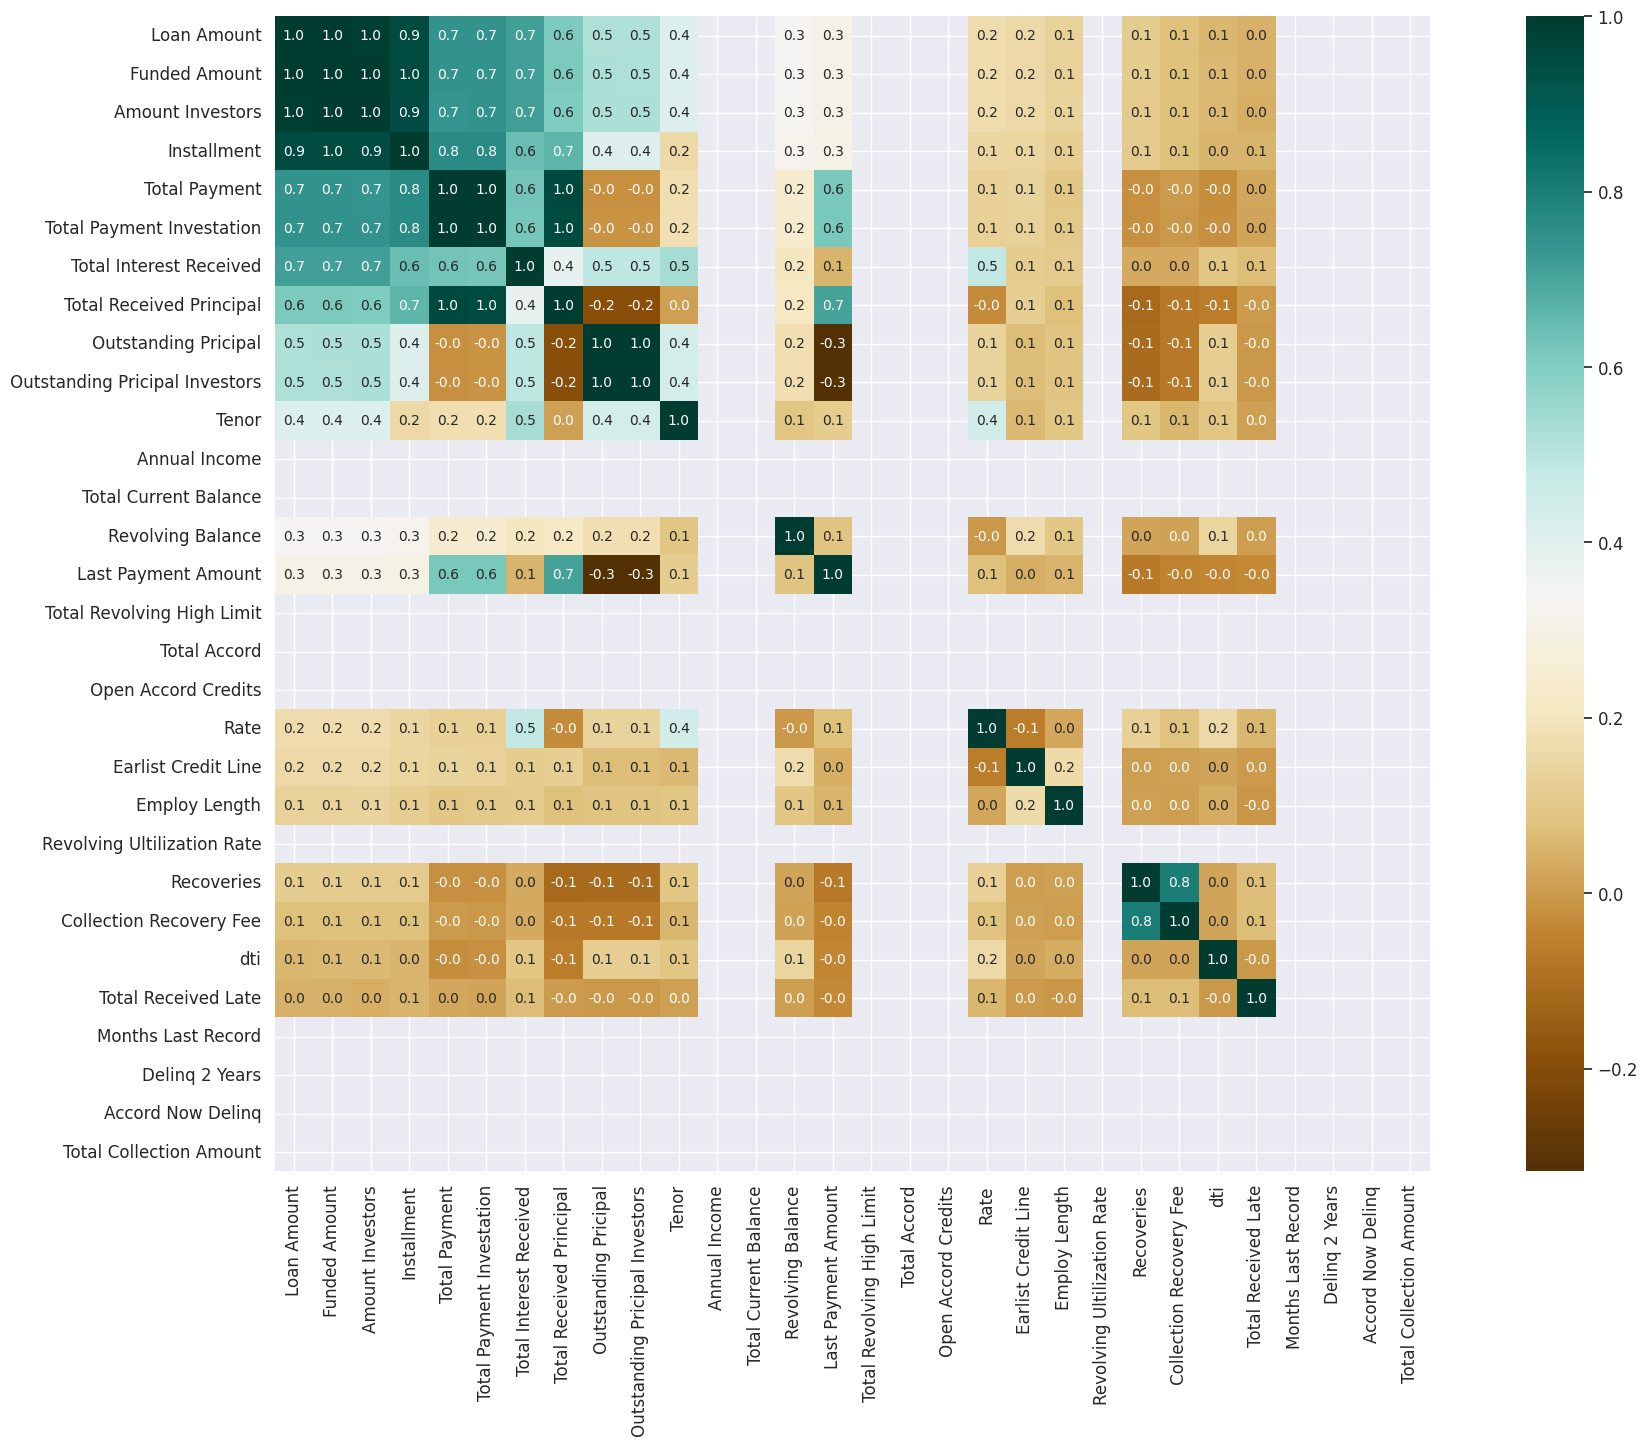

In [ ]:
#data = data.drop (columns=['id','Member'],axis=1)
c= data.corr()
k = 30
cols = c.nlargest(k, c.columns).index
cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale=1.10)
plt.figure(figsize=(25,15))
sns.heatmap(cm, cbar=True,annot=True, cmap='BrBG', fmt='.1f',annot_kws={'size':10}, square=True, yticklabels=cols.values, xticklabels=cols.values )
plt.show()

<ipython-input-65-fa979a763e94>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cr = data.corr()


<Axes: >

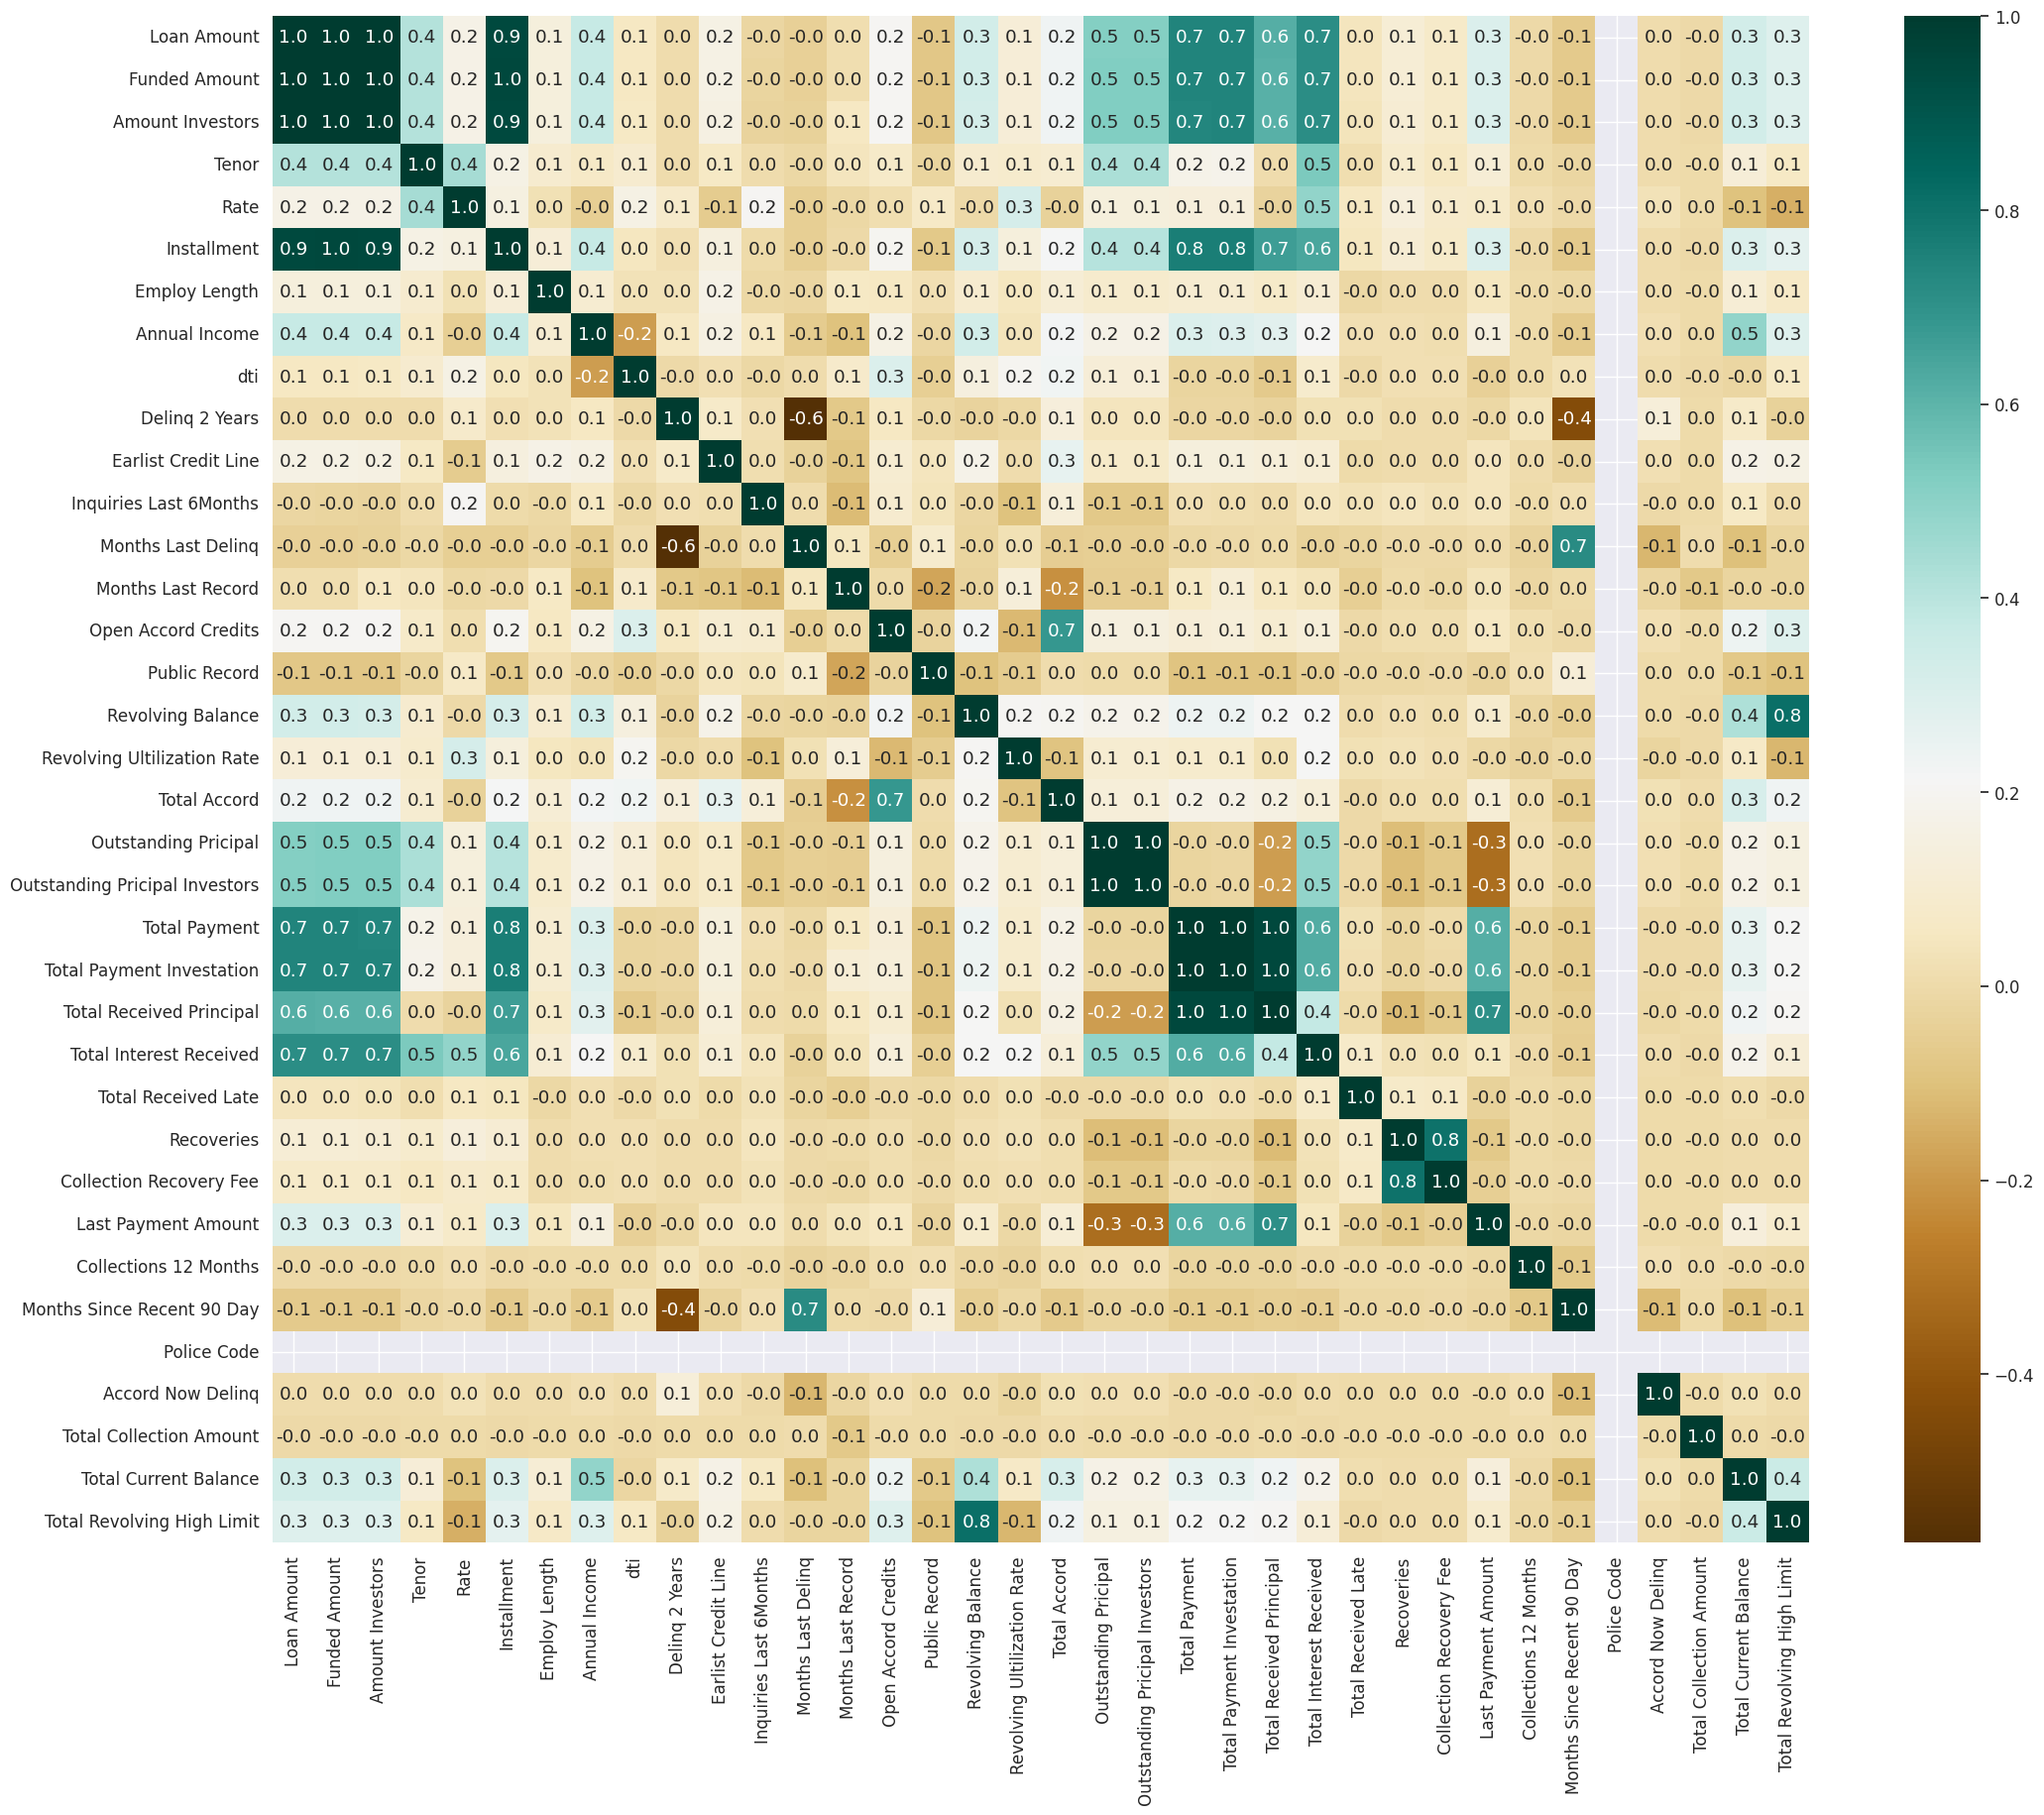

In [ ]:
cr = data.corr()
plt.figure(figsize=(25,20))
sns.heatmap(c, cbar=True,annot=True, cmap='BrBG',fmt='.1f')

In [ ]:
data.to_csv('data.csv',index=False)